In [1]:
import os
import sys
import torch
print(f"PyTorch 버전: {torch.__version__}")
print(f"GPU 사용 가능 여부: {torch.cuda.is_available()}")
from torch import nn, optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import datetime
import pandas as pd
import yfinance as yf
import wandb
wandb.login()
abled=True
add_next_open=True

# 1. 경로 설정 (드라이브 마운트 제거)
# 현재 파이썬 파일(.ipynb)이 있는 위치를 기준으로 설정합니다.
BASE_PATH = r"C:\hw1_5"
'''
from google.colab import drive
import os
import sys
print("Google Drive를 마운트합니다...")
drive.mount('/content/drive')
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from pathlib import Path
from datetime import datetime
import wandb

DRIVE_BASE_PATH = "/content/drive/MyDrive"
PROJECT_NAME = "hw1_5"
BASE_PATH = os.path.join(DRIVE_BASE_PATH, PROJECT_NAME)
'''

if BASE_PATH not in sys.path:
    sys.path.append(BASE_PATH)
print(f"sys.path 프로젝트 경로 : {BASE_PATH}")

CHECKPOINT_FILE_PATH = os.path.join(BASE_PATH, "checkpoints")
if not os.path.isdir(CHECKPOINT_FILE_PATH):
    # 상위 폴더(BASE_PATH)도 없으면 함께 생성
    os.makedirs(CHECKPOINT_FILE_PATH, exist_ok=True)
    print(f"체크포인트 디렉토리가 생성되었습니다: {CHECKPOINT_FILE_PATH}")
else:
    print(f"체크포인트 디렉토리 존재함: {CHECKPOINT_FILE_PATH}")

import yfinance as yf
# Bitcoin 데이터 다운로드
btc_data = yf.download('BTC-KRW', start='2014-09-17', end='2025-11-25', interval='1d')
#데이터 저장
btc_data.to_csv('BTC_KRW_raw.csv')

#PROJECT_ROOT_PATH = "/content/drive/MyDrive/hw1_5"
PROJECT_ROOT_PATH = BASE_PATH

PyTorch 버전: 2.5.1+cu121
GPU 사용 가능 여부: True


wandb: Currently logged in as: kimminsuk9790 (kimminsuk9790-korea-university-of-technology-and-education) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
C:\Users\kimin\AppData\Local\Temp\ipykernel_39228\1300576766.py:54: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc_data = yf.download('BTC-KRW', start='2014-09-17', end='2025-11-25', interval='1d')


sys.path 프로젝트 경로 : C:\hw1_5
체크포인트 디렉토리 존재함: C:\hw1_5\checkpoints


[*********************100%***********************]  1 of 1 completed


In [2]:
# Python이 찾지 못하는 모듈의 실제 경로
TARGET_PATH = os.path.join(
    PROJECT_ROOT_PATH,
    "_01_code",
    "_03_real_world_data_to_tensors"
)

# 리눅스 'ls -l' 명령어로 파일 목록 출력
print(f"--- 쉘 명령어 파일 목록 검증 ---")
print(f"검증 경로: {TARGET_PATH}")
!ls -l "{TARGET_PATH}"

# 파일 이름과 정확히 일치하는지 확인 (대소문자 포함)
TARGET_FILE = "p__cryptocurrency_dataset_dataloader.py"

print(f"\n--- 최종 파일 존재 확인 ---")
if os.path.exists(os.path.join(TARGET_PATH, TARGET_FILE)):
    print(f"✅ Python OS 모듈 확인: 파일이 존재합니다!")
else:
    print(f"❌ Python OS 모듈 확인: 파일이 존재하지 않습니다. (이게 문제!)")

--- 쉘 명령어 파일 목록 검증 ---
검증 경로: C:\hw1_5\_01_code\_03_real_world_data_to_tensors

--- 최종 파일 존재 확인 ---
✅ Python OS 모듈 확인: 파일이 존재합니다!


'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [3]:
import importlib.util

# 모듈의 경로를 직접 구성합니다.
module_path = os.path.join(
    BASE_PATH,
    "_01_code",
    "_03_real_world_data_to_tensors",
    "p__cryptocurrency_dataset_dataloader.py"
)

# 모듈 이름을 지정합니다.
module_name = "_01_code._03_real_world_data_to_tensors.p__cryptocurrency_dataset_dataloader"

try:
    # 1. 파일이 실제로 존재하는지 확인합니다.
    if not os.path.exists(module_path):
        print("❌ 파일 존재 확인 실패! 파일이 Drive의 경로에 없습니다.")
        print(f"   요청 경로: {module_path}")
        print("   -> Drive에서 폴더/파일 이름 (대소문자 포함)을 다시 한번 확인해주세요.")

    else:
        # 2. 파일이 존재하면 importlib을 사용하여 강제로 모듈을 로드합니다.
        print(f"✅ 파일 존재 확인 성공. 강제 모듈 로드 시도.")

        spec = importlib.util.spec_from_file_location(module_name, module_path)

        # 모듈을 로드하여 변수에 할당합니다.
        data_loader_module = importlib.util.module_from_spec(spec)
        sys.modules[module_name] = data_loader_module
        spec.loader.exec_module(data_loader_module)

        # 로드된 모듈에서 원하는 함수와 클래스를 직접 가져옵니다.
        get_cryptocurrency_data = data_loader_module.get_cryptocurrency_data
        CryptoCurrencyDataset = data_loader_module.CryptoCurrencyDataset

        print("\n🎉 강제 모듈 로드 성공! 함수와 클래스가 준비되었습니다.")

        # 이후 다른 필요한 모듈을 기존 방식으로 가져옵니다.
        from _01_code._18_lstm_and_its_application.f_arg_parser import get_parser
        from _01_code._17_rnn.g_rnn_trainer import RegressionTrainer

        print("🎉 나머지 모듈도 성공적으로 가져왔습니다.")

except Exception as e:
    print(f"\n❌ 최종 로드 실패. 발생한 오류: {e}")

✅ 파일 존재 확인 성공. 강제 모듈 로드 시도.

🎉 강제 모듈 로드 성공! 함수와 클래스가 준비되었습니다.
🎉 나머지 모듈도 성공적으로 가져왔습니다.


In [4]:
# https://towardsdatascience.com/cryptocurrency-price-prediction-using-deep-learning-70cfca50dd3a
from pathlib import Path
from torch.utils.data import Dataset, DataLoader
import os
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

#BASE_PATH = "/content/drive/MyDrive/hw1_5"
import sys
sys.path.append(BASE_PATH)

class CryptoCurrencyDataset(Dataset):
  def __init__(self, X, y, is_regression=True):
    self.X = X
    self.y = y

    assert len(self.X) == len(self.y)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    X = self.X[idx]
    y = self.y[idx]
    return X, y

  def __str__(self):
    str = "Data Size: {0}, Input Shape: {1}, Target Shape: {2}".format(
      len(self.X), self.X.shape, self.y.shape
    )
    return str

def get_cryptocurrency_data(
    sequence_size=21, validation_size=150, test_size=30,
    target_column='Close', y_normalizer=1.0e7, is_regression=True,
    add_next_open=False
):
  btc_krw_path = os.path.join(BASE_PATH, "BTC_KRW_2025_11_30.csv")
  # df = pd.read_csv(btc_krw_path)
  # row_size = len(df)
  # ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
  # date_list = df['Date']
  # df = df.drop(columns=['Date'])

  # 1. CSV 파일 읽기:
  # - header=None: 헤더 행을 사용하지 않음 (Pandas가 0, 1, 2...로 컬럼 이름 부여)
  # - skiprows=[0, 1, 2]: 1행, 2행, 3행 (인덱스 0, 1, 2)을 모두 건너뜀
  # - index_col=0: 첫 번째 열 (날짜 데이터)을 인덱스로 사용
  df = pd.read_csv(btc_krw_path, header=None, skiprows=[0, 1, 2], index_col=0)

  # 2. 컬럼 이름 수동 설정
  # 4행부터 데이터가 시작되므로, 컬럼 이름은 직접 지정해야 합니다.
  df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
  if add_next_open:
    # Open 가격을 한 칸 위로 올리면, 현재 행(오늘)의 피처에 다음 날 시가가 들어옵니다.
    df['Next_Open'] = df['Open'].shift(-1)
    # 마지막 행은 다음 날 데이터가 없어 NaN이 되므로 제거합니다.
    df = df.dropna()
  print(f"DEBUG: df 컬럼 목록: {df.columns.tolist()}")
  # 3. 인덱스 이름 설정
  df.index.name = 'Date'
  # 4. 인덱스를 일반 열로 변환
  df = df.reset_index()
  # 5. 'Date' 열이 생성되었으므로 추출
  date_list = df['Date']
  # 6. 불필요한 'Price' 컬럼 제거 (Price는 Close와 거의 동일할 수 있으므로 제거)
  # 만약 'Price'가 Close와 중복되거나 필요 없다면 제거합니다.
  # df = df.drop(columns=['Price', 'Date'])
  df = df.drop(columns=['Date'], errors='ignore') # <-- 수정된 로직 (Price는 이미 헤더에서 제거됨)

  if not is_regression :
    # 가격 관련 컬럼들만 변환
    price_cols = ['Open', 'High', 'Low', 'Close']
    df[price_cols] = np.log(df[price_cols] / df[price_cols].shift(1))
    df = df.dropna().reset_index(drop=True) # 깔끔하게 인덱스 재정렬

  print("--- DataFrame 최종 컬럼 이름 확인 ---")
  print(df.columns.tolist())
  print("-----------------------------------")

  row_size = len(df)
  data_size = row_size - sequence_size
  train_size = data_size - (validation_size + test_size)
  #################################################################################################

  r=1
  row_cursor = 0

  X_train_list = []
  y_train_regression_list = []
  y_train_classification_list = []
  y_train_date = []
  '''
  # 1. 변화율 계산
  df_pct = df[['Open', 'High', 'Low', 'Close', 'Volume']].pct_change()
  # 2. 첫 번째 행의 NaN을 0으로 채우기 (데이터 개수 유지)
  df_pct = df_pct.fillna(0)
  # 3. 스케일 조정 (* 100)
  df_pct = df_pct * 100
  # 이제 df와 df_pct의 길이가 완벽히 일치합니다.
  print(f"DEBUG: df length = {len(df)}, df_pct length = {len(df_pct)}")
  '''
  for idx in range(0, train_size):
    #sequence_data = df.iloc[idx: idx + sequence_size].values  # sequence_data.shape: (sequence_size, 5)
    # 1. 입력 X: 회귀 m_y, s_y와 짝을 맞추기 위해 다시 원본 가격(df) 사용
    sequence_data = df.iloc[idx : idx + sequence_size].values
    X_train_list.append(torch.from_numpy(sequence_data))

    # 2. 회귀 정답: 원본 가격 (나중에 루프 밖에서 m_y, s_y로 예쁘게 압축됨)
    target_price = df.iloc[idx + sequence_size][target_column]
    y_train_regression_list.append(target_price)

    # 3. 분류 정답: 원본 가격끼리 비교 (df_pct를 섞지 마세요!)
    today_price = df.iloc[idx + sequence_size - 1][target_column]
    change = target_price - today_price
    y_train_classification_list.append(1 if change > 0 else 0)

    y_train_date.append(date_list[idx + sequence_size])
    row_cursor += 1

  X_train = torch.stack(X_train_list, dim=0).to(torch.float)

  # [수정 전]
  # m = X_train.mean(dim=0, keepdim=True)
  # s = X_train.std(dim=0, keepdim=True)
  # [수정 후]
  # 피처별로 하나의 통계치만 나오도록 dim=(0, 1)로 수정합니다.
  m = X_train.mean(dim=(0, 1), keepdim=True) # [1, 1, 5] 형태로 나옴
  s = X_train.std(dim=(0, 1), keepdim=True) + 1e-7 # 0 나누기 방지
  X_train = (X_train - m) / s
  # 1. target_column(종가)이 몇 번째 열인지 인덱스를 찾습니다.
  # 만약 df가 [Open, High, Low, Close, Next_Open] 순서라면 Close는 3번 인덱스입니다.
  target_idx = df.columns.get_loc(target_column)
  # 2. X를 정규화할 때 썼던 m과 s에서, '종가'에 해당하는 값만 쏙 뽑아옵니다.
  m_y = m[0, 0, target_idx]
  s_y = s[0, 0, target_idx]
  #y_train_regression = torch.tensor(y_train_regression_list, dtype=torch.float32) / y_normalizer
  y_train_regression = (torch.tensor(y_train_regression_list, dtype=torch.float32) - m_y) / s_y * r
  # 범인 검거용 코드
  unique_labels = np.unique(y_train_classification_list)
  print(f"발견된 라벨 종류: {unique_labels}")
  y_train_classification  = torch.tensor(y_train_classification_list, dtype=torch.long)
  #y_train_classification = torch.tensor(y_train_classification_list, dtype=torch.float32).view(-1, 1)

  # 1. 상승/하락 비율 확인
  unique, counts = np.unique(y_train_classification, return_counts=True)
  print(f"클래스 비율: {dict(zip(unique, counts))}")

  # 2. 비율이 깨져 있다면, 클래스 가중치를 손실함수에 부여 (간편한 방법)
  # 하락이 45%, 상승이 55%라면 하락에 가중치를 더 줌
  #weights = torch.tensor([1.2, 0.8]).to(device) # [하락가중치, 상승가중치]
  #self.loss_fn = nn.CrossEntropyLoss(weight=weights)

  #################################################################################################

  X_validation_list = []
  y_validation_regression_list = []
  y_validation_classification_list = []
  y_validation_date = []
  for idx in range(row_cursor, row_cursor + validation_size):
    sequence_data = df.iloc[idx: idx + sequence_size].values  # sequence_data.shape: (sequence_size, 5)
    X_validation_list.append(torch.from_numpy(sequence_data))
    y_validation_regression_list.append(df.iloc[idx + sequence_size][target_column])
    y_validation_classification_list.append(
      1 if df.iloc[idx + sequence_size][target_column] >= df.iloc[idx + sequence_size - 1][target_column] else 0
    )
    y_validation_date.append(date_list[idx + sequence_size])
    row_cursor += 1

  X_validation = torch.stack(X_validation_list, dim=0).to(torch.float)

  #y_validation_regression = torch.tensor(y_validation_regression_list, dtype=torch.float32) / y_normalizer
  y_validation_regression = (torch.tensor(y_validation_regression_list) - m_y) / s_y * r
  y_validation_classification = torch.tensor(y_validation_classification_list, dtype=torch.int64)
  #y_validation_classification = torch.tensor(y_validation_classification_list, dtype=torch.float32).view(-1, 1)

  X_validation = (X_validation - m) / s
  #################################################################################################

  X_test_list = []
  y_test_regression_list = []
  y_test_classification_list = []
  y_test_date = []
  for idx in range(row_cursor, row_cursor + test_size):
    sequence_data = df.iloc[idx: idx + sequence_size].values  # sequence_data.shape: (sequence_size, 5)
    X_test_list.append(torch.from_numpy(sequence_data))
    y_test_regression_list.append(df.iloc[idx + sequence_size][target_column])
    #y_test_classification_list.append(1 if df.iloc[idx + sequence_size][target_column] > df.iloc[idx + sequence_size - 1][target_column] else 0)
    #y_test_classification_list.append(1 if df.iloc[idx + sequence_size][target_column] > 0.0001 else 0)
    target_price = df.iloc[idx + sequence_size][target_column]
    prev_price = df.iloc[idx + sequence_size - 1][target_column]
    y_test_classification_list.append(1 if target_price > prev_price else 0)
    y_test_date.append(date_list[idx + sequence_size])
    row_cursor += 1

  X_test = torch.stack(X_test_list, dim=0).to(torch.float)

  #y_test_regression = torch.tensor(y_test_regression_list, dtype=torch.float32) / y_normalizer
  y_test_regression = (torch.tensor(y_test_regression_list) - m_y) / s_y * r
  y_test_classification = torch.tensor(y_test_classification_list, dtype=torch.int64)
  #y_test_classification = torch.tensor(y_test_classification_list, dtype=torch.float32).view(-1, 1)

  X_test = (X_test - m) / s
  ###########################################################################
  if is_regression:
    return (
      X_train, X_validation, X_test,
      y_train_regression, y_validation_regression, y_test_regression,
      y_train_date, y_validation_date, y_test_date
    )
  else:
    return (
      X_train, X_validation, X_test,
      y_train_classification, y_validation_classification, y_test_classification,
      y_train_date, y_validation_date, y_test_date
    )


if __name__ == "__main__":
  is_regression = False
  global add_next_open

  X_train, X_validation, X_test, y_train, y_validation, y_test, y_train_date, y_validation_date, y_test_date \
    = get_cryptocurrency_data(
    sequence_size=10, validation_size=100, test_size=10,
    target_column='Close', y_normalizer=1.0e7, is_regression=is_regression,
    add_next_open=add_next_open
  )

  train_crypto_currency_dataset = CryptoCurrencyDataset(X=X_train, y=y_train, is_regression=is_regression)
  validation_crypto_currency_dataset = CryptoCurrencyDataset(X=X_validation, y=y_validation, is_regression=is_regression)
  test_crypto_currency_dataset = CryptoCurrencyDataset(X=X_test, y=y_test, is_regression=is_regression)

  train_data_loader = DataLoader(
    dataset=train_crypto_currency_dataset,
    batch_size=32,
    shuffle=True,
    drop_last=True,
  )

  for idx, batch in enumerate(train_data_loader):
    input, target = batch
    print("{0} - {1}: {2}, {3}".format(idx, input.shape, target.shape, target))

DEBUG: df 컬럼 목록: ['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
--- DataFrame 최종 컬럼 이름 확인 ---
['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
-----------------------------------
발견된 라벨 종류: [0 1]
클래스 비율: {np.int64(0): np.int64(2021), np.int64(1): np.int64(1950)}
0 - torch.Size([32, 10, 6]): torch.Size([32]), tensor([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0])
1 - torch.Size([32, 10, 6]): torch.Size([32]), tensor([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 0, 1, 0, 0])
2 - torch.Size([32, 10, 6]): torch.Size([32]), tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 0, 0, 0, 0, 1])
3 - torch.Size([32, 10, 6]): torch.Size([32]), tensor([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0])
4 - torch.Size([32, 10, 6]): torch.Size([32]), tensor([0, 0, 1, 1, 0, 0, 0, 0, 0,

In [5]:
dr=0.3
wd=1e-4
esp=8

# 현재 설정된 경로 (hw1_5 폴더)
PROJECT_BASE_PATH = BASE_PATH

# __init__.py 파일을 생성할 필수 폴더 목록
folders_to_init = [
    os.path.join(PROJECT_BASE_PATH, "_01_code"),
    os.path.join(PROJECT_BASE_PATH, "_01_code", "_18_lstm_and_its_application"),
    os.path.join(PROJECT_BASE_PATH, "_01_code", "_17_rnn"),
    os.path.join(PROJECT_BASE_PATH, "_01_code", "_03_real_world_data_to_tensors"),
]

print("\n--- __init__.py 파일 최종 점검 및 생성 ---")
for folder in folders_to_init:
    init_file = os.path.join(folder, "__init__.py")

    # 폴더가 존재해야 합니다.
    if os.path.isdir(folder):
        if not os.path.exists(init_file):
            # 빈 파일을 생성합니다.
            with open(init_file, 'w') as f:
                pass
            print(f"➕ 생성 완료: {init_file}")
        else:
            print(f"   💡 이미 존재함: {init_file}")
    else:
        print(f"   ❌ 오류: 필수 폴더가 Drive에 없습니다: {folder}")

from _01_code._18_lstm_and_its_application.f_arg_parser import get_parser
from _01_code._17_rnn.g_rnn_trainer import RegressionTrainer
# from _01_code._03_real_world_data_to_tensors.p__cryptocurrency_dataset_dataloader import get_cryptocurrency_data, \ CryptoCurrencyDataset

def get_btc_krw_data(sequence_size=21, validation_size=150, test_size=30, is_regression=True, add_next_open=False):
  X_train, X_validation, X_test, y_train, y_validation, y_test, y_train_date, y_validation_date, y_test_date \
    = get_cryptocurrency_data(
      sequence_size=sequence_size,
      validation_size=validation_size,
      test_size=test_size,
      target_column='Close',
      y_normalizer=1.0e7,
      is_regression=is_regression,
      add_next_open=add_next_open,
  )

  # print(X_train.shape, X_validation.shape, X_test.shape, y_train.shape, y_validation.shape, y_test.shape, "!!! - 1")

  # X_train.shape: [3212, 10, 5]
  # X_validation.shape: [100, 10, 5]
  # X_test.shape: [10, 10, 5]
  # y_train.shape: [3212]
  # y_validation.shape: [100]
  # y_test.shape: [10]

  train_crypto_currency_dataset = CryptoCurrencyDataset(X=X_train, y=y_train)
  validation_crypto_currency_dataset = CryptoCurrencyDataset(X=X_validation, y=y_validation)
  test_crypto_currency_dataset = CryptoCurrencyDataset(X=X_test, y=y_test)

  train_data_loader = DataLoader(
    dataset=train_crypto_currency_dataset, batch_size=wandb.config.batch_size, shuffle=True
  )
  validation_data_loader = DataLoader(
    dataset=validation_crypto_currency_dataset, batch_size=wandb.config.batch_size, shuffle=True
  )
  test_data_loader = DataLoader(
    dataset=test_crypto_currency_dataset, batch_size=len(test_crypto_currency_dataset), shuffle=True
  )

  return train_data_loader, validation_data_loader, test_data_loader


def get_model(add_next_open=False, self_attention=False):
  class MyModel(nn.Module):
    def __init__(self, n_input, n_output):
      super().__init__()

      self.lstm = nn.LSTM(
          input_size=n_input,
          hidden_size=256, #128,
          num_layers=2,
          batch_first=True,
          dropout=0.34,
      )
      self.fcn = nn.Sequential(
          nn.Linear(256, 64),
          nn.LayerNorm(64),  # 데이터 분포를 안정화시켜 학습 속도와 성능 향상
          nn.LeakyReLU(),        # <<-- 이게 있어야 '선형'에서 벗어납니다!
          nn.Dropout(0.34),  # 과적합 방지 추가
          nn.Linear(64, n_output)
      )
      # nn.Linear(in_features=128, out_features=n_output)

    def forward(self, x):
      x, hidden = self.lstm(x)
      x = x[:, -1, :]  # x.shape: [32, 128]
      x = self.fcn(x)
      return x

  if add_next_open :
    my_model = MyModel(n_input=6, n_output=1)
  else :
    my_model = MyModel(n_input=5, n_output=1)

  return my_model

def main(args):
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': args.learning_rate * 4,
    'early_stop_patience': 10, #args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta,
    'weight_decay': 32e-7, #args.weight_decay
  }

  project_name = "lstm_regression_btc_krw"
  wandb.init(
    mode="online" if args.wandb else "disabled",
    project=project_name,
    notes="btc_krw experiment with lstm",
    tags=["lstm", "regression", "btc_krw"],
    name=run_time_str,
    config=config
  )
  print(args)
  print(wandb.config)

  global add_next_open
  train_data_loader, validation_data_loader, _ = get_btc_krw_data(add_next_open=add_next_open)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(f"Training on device {device}.")

  model = get_model(add_next_open=add_next_open)
  model.to(device)

  optimizer = optim.Adam(model.parameters(), lr=wandb.config.learning_rate, weight_decay=wandb.config.weight_decay)

  regression_trainer = RegressionTrainer(
    project_name, model, optimizer, train_data_loader, validation_data_loader, None,
    run_time_str, wandb, device, CHECKPOINT_FILE_PATH
  )
  regression_trainer.train_loop()

  wandb.finish()


if __name__ == "__main__":
  # Colab/Jupyter 환경에서 커널 인수를 무시하도록 만듭니다.
  if 'ipykernel_launcher.py' in sys.argv[0] or 'colab_kernel_launcher.py' in sys.argv[0]:
    # 시스템 인수를 현재 스크립트 이름만 남기고 모두 초기화합니다.
    sys.argv = [sys.argv[0]]
    # ----------------------------
  parser = get_parser()
  args = parser.parse_args()
  global abled
  args.wandb=abled
  main(args)


--- __init__.py 파일 최종 점검 및 생성 ---
   💡 이미 존재함: C:\hw1_5\_01_code\__init__.py
   💡 이미 존재함: C:\hw1_5\_01_code\_18_lstm_and_its_application\__init__.py
   💡 이미 존재함: C:\hw1_5\_01_code\_17_rnn\__init__.py
   💡 이미 존재함: C:\hw1_5\_01_code\_03_real_world_data_to_tensors\__init__.py


Namespace(wandb=True, batch_size=2048, epochs=10000, learning_rate=0.0001, weight_decay=0.0, validation_intervals=30, early_stop_patience=30, early_stop_delta=1e-06)
{'epochs': 10000, 'batch_size': 2048, 'validation_intervals': 30, 'learning_rate': 0.0004, 'early_stop_patience': 10, 'early_stop_delta': 1e-06, 'weight_decay': 3.2e-06}
DEBUG: df 컬럼 목록: ['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
--- DataFrame 최종 컬럼 이름 확인 ---
['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
-----------------------------------
발견된 라벨 종류: [0 1]
클래스 비율: {np.int64(0): np.int64(1838), np.int64(1): np.int64(2053)}
Training on device cuda:0.
[Epoch   1] T_loss: 0.84524, V_loss: 5.85197, Early stopping is stated! | T_time: 00:00:00, T_speed: 0.000
[Epoch  30] T_loss: 0.04824, V_loss: 0.84804, V_loss decreased (5.85197 --> 0.84804). Saving model... | T_time: 00:00:01, T_speed: 30.000
[Epoch  60] T_loss: 0.03652, V_loss: 0.38158, V_loss decreased (0.84804 --> 0.38158). Saving model... | T_time: 0

Epoch,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Training loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Training speed (epochs/sec.),▁█▆▅▆▅▆▅▅▆▅▆▅▆▅▅▅▅▆▅▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
Validation loss,█▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,1110
Training loss,0.02279
Training speed (epochs/sec.),19.13793
Validation loss,0.11973


MODEL FILE: C:\hw1_5\checkpoints\lstm_regression_btc_krw_checkpoint_latest.pt
DEBUG: df 컬럼 목록: ['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
--- DataFrame 최종 컬럼 이름 확인 ---
['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
-----------------------------------


C:\Users\kimin\AppData\Local\Temp\ipykernel_39228\3960898505.py:103: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_model.load_state_dict(torch.load(latest_file_path, ma

발견된 라벨 종류: [0 1]
클래스 비율: {np.int64(0): np.int64(1838), np.int64(1): np.int64(2053)}
[TEST DATA]
 0: 342.23 <--> 344.17 (Loss:          1.94)
 1: 337.99 <--> 339.81 (Loss:          1.82)
 2: 297.38 <--> 296.20 (Loss:          1.19)
 3: 286.50 <--> 279.47 (Loss:          7.02)
 4: 337.81 <--> 305.62 (Loss:         32.19)
 5: 346.18 <--> 366.16 (Loss:         19.98)
 6: 347.01 <--> 363.38 (Loss:         16.37)
 7: 300.57 <--> 296.03 (Loss:          4.54)
 8: 311.08 <--> 279.88 (Loss:         31.20)
 9: 287.64 <--> 287.12 (Loss:          0.52)
10: 303.95 <--> 272.35 (Loss:         31.60)
11: 329.04 <--> 310.34 (Loss:         18.69)
12: 336.21 <--> 344.30 (Loss:          8.09)
13: 346.99 <--> 349.54 (Loss:          2.54)
14: 347.72 <--> 361.36 (Loss:         13.64)
15: 315.78 <--> 301.83 (Loss:         13.96)
16: 341.90 <--> 341.96 (Loss:          0.07)
17: 337.00 <--> 349.87 (Loss:         12.87)
18: 339.83 <--> 333.04 (Loss:          6.78)
19: 346.07 <--> 332.61 (Loss:         13.46)
20: 

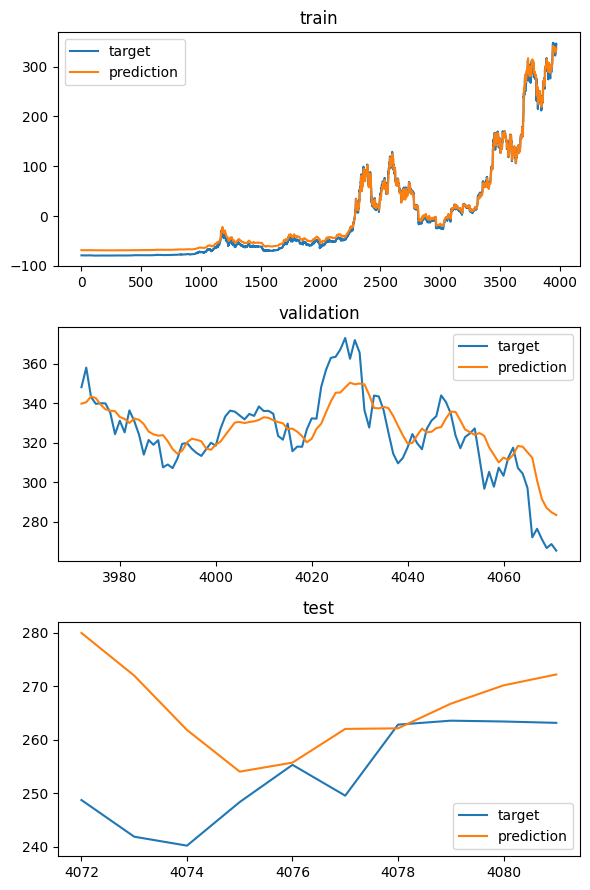

In [6]:
def test(test_model, add_next_open=False):
  _, _, test_data_loader = get_btc_krw_data(add_next_open=add_next_open)

  test_model.eval()

  y_normalizer = 100

  print("[TEST DATA]")
  with torch.no_grad():
    for test_batch in test_data_loader:
      input_test, target_test = test_batch

      output_test = test_model(input_test)

    for idx, (output, target) in enumerate(zip(output_test, target_test)):
      print("{0:2}: {1:6,.2f} <--> {2:6,.2f} (Loss: {3:>13,.2f})".format(
        idx,
        output.item() * y_normalizer,
        target.item() * y_normalizer,
        abs(output.squeeze(dim=-1).item() - target.item()) * y_normalizer
      ))


def predict_all(test_model, add_next_open=False):
  y_normalizer = 100

  X_train, X_validation, X_test, y_train, y_validation, y_test, y_train_date, y_validation_date, y_test_date \
    = get_cryptocurrency_data(
      sequence_size=10,
      validation_size=100,
      test_size=10,
      target_column='Close',
      y_normalizer=1.0e7,
      is_regression=True,
      add_next_open=add_next_open,
  )

  train_crypto_currency_dataset = CryptoCurrencyDataset(X=X_train, y=y_train)
  validation_crypto_currency_dataset = CryptoCurrencyDataset(X=X_validation, y=y_validation)
  test_crypto_currency_dataset = CryptoCurrencyDataset(X=X_test, y=y_test)

  dataset_list = [
    train_crypto_currency_dataset, validation_crypto_currency_dataset, test_crypto_currency_dataset
  ]
  dataset_labels = [
    "train", "validation", "test"
  ]
  num = 0
  fig, axs = plt.subplots(3, 1, figsize=(6, 9))

  for i in range(3):
    X = []
    TARGET_Y = []
    PREDICTION_Y = []
    for data in dataset_list[i]:
      input, target = data
      prediction = test_model(input.unsqueeze(0)).squeeze(-1).squeeze(-1)

      X.append(num)
      TARGET_Y.append(target.item() * y_normalizer)
      PREDICTION_Y.append(prediction.item() * y_normalizer)

      num += 1

    axs[i].plot(X, TARGET_Y, label='target')
    axs[i].plot(X, PREDICTION_Y, label='prediction')
    axs[i].set_title(dataset_labels[i])
    axs[i].legend()

  plt.tight_layout()
  plt.show()


def main(args):
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': args.learning_rate,
    'early_stop_patience': esp, # args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta,
  }

  project_name = "lstm_regression_btc_krw"
  wandb.init(
    mode="disabled",
    project=project_name,
    notes="btc_krw experiment with lstm",
    tags=["lstm", "regression", "btc_krw"],
    name=run_time_str,
    config=config
  )
  global add_next_open
  test_model = get_model(add_next_open=add_next_open)

  project_name = "lstm_regression_btc_krw"
  latest_file_path = os.path.join(
    CHECKPOINT_FILE_PATH, f"{project_name}_checkpoint_latest.pt"
  )
  print("MODEL FILE: {0}".format(latest_file_path))
  test_model.load_state_dict(torch.load(latest_file_path, map_location=torch.device('cpu')))

  test(test_model,add_next_open=add_next_open)
  predict_all(test_model,add_next_open=add_next_open)


if __name__ == "__main__":
  parser = get_parser()
  args = parser.parse_args()
  main(args)

In [7]:
from _01_code._09_fcn_best_practice.c_trainer import ClassificationTrainer

def get_model(add_next_open=False):
  class MyModel(nn.Module):
    def __init__(self, n_input, n_output):
      super().__init__()
      #self.input_bn = nn.BatchNorm1d(21) # 시퀀스 길이에 맞춰 설정
      self.lstm = nn.LSTM(
        input_size=n_input,
        hidden_size=128, #256,
        num_layers=2, #3,
        batch_first=True,
        dropout=0.1,
      )
      self.fcn = nn.Sequential(
        nn.LayerNorm(128),
        nn.Linear(128,32),
        # 2. BatchNorm으로 샘플 간의 차이를 정규화 (LayerNorm보다 변별력에 유리)
        #nn.BatchNorm1d(32),
        nn.LeakyReLU(negative_slope=0.1),        # <<-- 비선형성 추가
        nn.Dropout(0.45),
        #nn.Linear(128,64),
        #nn.ReLU(),
        nn.Linear(32, n_output), # 최종 출력
        #nn.Softmax(dim=1),
      )
      #nn.Linear(in_features=256, out_features=n_output)

    def forward(self, x):
      #x = self.input_bn(x) # 입력을 받자마자 정규화해서 숫자를 작게 만듦
      x, hidden = self.lstm(x)
      x = x[:, -1, :]  # x.shape: [32, 128]
      #x = torch.mean(x, dim=1)
      x = self.fcn(x)
      #print(x[0])
      return x

  if add_next_open :
    my_model = MyModel(n_input=6, n_output=2)
  else :
    my_model = MyModel(n_input=5, n_output=2)

  return my_model


def main(args):
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': 64, #args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': 1e-4, #args.learning_rate,
    'early_stop_patience': 20, #args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta,
    'weight_decay': 10e-3, #args.weight_decay
  }

  project_name = "lstm_classification_btc_krw"
  wandb.init(
    mode="online" if args.wandb else "disabled",
    project=project_name,
    notes="btc_krw experiment with lstm",
    tags=["lstm", "classification", "btc_krw"],
    name=run_time_str,
    config=config
  )
  print(args)
  print(wandb.config)

  global add_next_open
  train_data_loader, validation_data_loader, _ = get_btc_krw_data(
      is_regression=False, add_next_open=add_next_open)
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(f"Training on device {device}.")

  model = get_model(add_next_open=add_next_open)
  model.to(device)

  inputs, labels = next(iter(train_data_loader))
  print("입력 데이터 차원:", inputs.shape)

  optimizer = optim.Adam(
      model.parameters(),
      lr=1e-3, #wandb.config.learning_rate,
      weight_decay=1e-02#wandb.config.weight_decay
  )
  # 1. 가중치 계산 (하락: 1879, 상승: 2094)
  class_weights = torch.tensor([0.9, 1.1]).to(device)

  classification_trainer = ClassificationTrainer(
    project_name, model, optimizer, train_data_loader, validation_data_loader, None,
    run_time_str, wandb, device, CHECKPOINT_FILE_PATH
  )
  # 3. [핵심] 생성된 트레이너의 loss_fn만 강제로 교체
  classification_trainer.loss_fn = nn.CrossEntropyLoss(weight=class_weights)

  # 1. 데이터셋 내부 타입을 강제로 Long으로 고정
  train_crypto_currency_dataset.y = (train_crypto_currency_dataset.y > 0).long()
  validation_crypto_currency_dataset.y = (validation_crypto_currency_dataset.y > 0).long()
  test_crypto_currency_dataset.y = (test_crypto_currency_dataset.y > 0).long()

  # 2. [핵심] 변환된 데이터셋으로 DataLoader를 다시 생성하여 트레이너에 주입
  classification_trainer.train_data_loader = DataLoader(
    dataset=train_crypto_currency_dataset,
    batch_size=args.batch_size, # 기존 설정값 사용
    shuffle=True,
    drop_last=True
  )
  classification_trainer.validation_data_loader = DataLoader(
    dataset=validation_crypto_currency_dataset,
    batch_size=args.batch_size,
    shuffle=False,    # 검증 시에는 굳이 섞지 않아도 됩니다.
    drop_last=False   # <--- 반드시 False로 바꿔주세요!
  )

  # ==========================================
  # [데이터 긴급 점검] 학습 시작 전 꼭 확인하세요!
  # ==========================================
  print("--- [1. 정답 데이터 샘플 확인] ---")
  # y_train에 0과 1이 정상적으로 섞여 있는지 확인
  sample_y = train_crypto_currency_dataset.y[:20].tolist()
  print(f"처음 20개 정답지: {sample_y}")
  print(f"0의 개수: {sample_y.count(0)}, 1의 개수: {sample_y.count(1)}")
  print("\n--- [2. 입력 데이터(X) 스케일 확인] ---")
  # 로그 수익률 + 평준화가 적용되었다면 값들이 -5 ~ 5 사이에 있어야 합니다.
  sample_x = train_crypto_currency_dataset.X[0]
  print(f"X 데이터 평균: {sample_x.mean().item():.4f}")
  print(f"X 데이터 표준편차: {sample_x.std().item():.4f}")
  print(f"X 데이터 최소/최대: {sample_x.min().item():.4f} / {sample_x.max().item():.4f}")
  print("\n--- [3. 데이터 로더 배치 확인] ---")
  for x_batch, y_batch in classification_trainer.train_data_loader:
      print(f"배치 X shape: {x_batch.shape}") # (Batch_size, Sequence_size, Features)
      print(f"배치 y shape: {y_batch.shape}") # (Batch_size,)
      break

  print(f"DEBUG: y_train shape = {train_crypto_currency_dataset.y.shape}")
  print(f"DEBUG: y_train unique values = {torch.unique(train_crypto_currency_dataset.y)}")
  if train_crypto_currency_dataset.y.max() >= 2:
    print("!!! 에러 확정: 라벨에 0, 1 이외의 값이 들어있습니다 !!!")

  classification_trainer.train_loop()

  # trainer.train() 실행 이후 main 함수 하단
  model.eval()
  with torch.no_grad():
      # 검증 데이터에서 딱 한 배치만 가져오기
      inputs, labels = next(iter(validation_data_loader))
      inputs, labels = inputs.to(device), labels.to(device)

      # 모델 예측
      logits = model(inputs)

      # 1. 확률값 계산 (Softmax)
      probs = torch.softmax(logits, dim=1)

      # 2. 결과 출력 (상위 10개)
      print("\n" + "="*30)
      print("--- 모델 예측 확률 (하락 | 상승) ---")
      #for i in range(10):
      for i in range(len(labels)) :
          p_down = probs[i][0].item()
          p_up = probs[i][1].item()
          target = labels[i].item()
          # 확률이 0.5 근처인지, 아니면 한쪽으로 쏠렸는지 확인
          print(f"샘플 {i}: 하락 {p_down:.4f} | 상승 {p_up:.4f} --> 정답: {target}")
      print("="*30 + "\n")

  wandb.finish()

if __name__ == "__main__":
  parser = get_parser()
  args = parser.parse_args()
  global abled
  args.wandb=abled
  main(args)

Namespace(wandb=True, batch_size=2048, epochs=10000, learning_rate=0.0001, weight_decay=0.0, validation_intervals=30, early_stop_patience=30, early_stop_delta=1e-06)
{'epochs': 10000, 'batch_size': 64, 'validation_intervals': 30, 'learning_rate': 0.0001, 'early_stop_patience': 20, 'early_stop_delta': 1e-06, 'weight_decay': 0.01}
DEBUG: df 컬럼 목록: ['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
--- DataFrame 최종 컬럼 이름 확인 ---
['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
-----------------------------------
발견된 라벨 종류: [0 1]
클래스 비율: {np.int64(0): np.int64(1982), np.int64(1): np.int64(1908)}
Training on device cuda:0.
입력 데이터 차원: torch.Size([64, 21, 6])
--- [1. 정답 데이터 샘플 확인] ---
처음 20개 정답지: [0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1]
0의 개수: 11, 1의 개수: 9

--- [2. 입력 데이터(X) 스케일 확인] ---
X 데이터 평균: -0.5618
X 데이터 표준편차: 0.9713
X 데이터 최소/최대: -2.3681 / 2.5305

--- [3. 데이터 로더 배치 확인] ---
배치 X shape: torch.Size([2048, 10, 6])
배치 y shape: torch.Size([2048])
DEBUG: y_train 

Epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
Training accuracy (%),▁▇▇██▇█████▇██▇████▇█▇███████▇███████▇██
Training loss,█▄▂▂▂▂▂▁▁▂▂▂▂▁▂▂▂▁▁▁▁▂▁▁▂▂▂▁▁▂▁▁▂▁▁▂▁▂▁▁
Training speed (epochs/sec.),▁▁▆█▆▅▆▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅
Validation accuracy (%),▁▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇
Validation loss,█▄▃▁▃▁▂▁▁▃▂▂▃▂▂▂▂▁▂▂▁▂▁▁▂▁▂▁▂▂▁▂▁▁▁▂▂▁▂▂
Epoch,1320
Training accuracy (%),74.75586
Training loss,0.51326
Training speed (epochs/sec.),52.8
Validation accuracy (%),73


In [8]:
def test(test_model,add_next_open=False):
  _, _, test_data_loader = get_btc_krw_data(
      is_regression=False, add_next_open=add_next_open
  )
  test_model.eval()

  num_corrects_test = 0
  num_tested_samples = 0

  print("[TEST DATA]")
  with torch.no_grad():
    for test_batch in test_data_loader:
      input_test, target_test = test_batch

      output_test = test_model(input_test)

      #probs = torch.softmax(output_test, dim=1)
      #custom_threshold = 0.97
      predicted_test = torch.argmax(output_test, dim=1)
      num_corrects_test += torch.sum(torch.eq(predicted_test, target_test))

      num_tested_samples += len(input_test)

    test_accuracy = 100.0 * num_corrects_test / num_tested_samples

    print(f"TEST RESULTS: {test_accuracy:6.3f}%")

    for idx, (output, target) in enumerate(zip(output_test, target_test)):
      print("{0:2}: {1:6,.2f} <--> {2:6,.2f}".format(
        idx, torch.argmax(output).item(), target.item()
      ))


def main(args):
  run_time_str = datetime.now().astimezone().strftime('%Y-%m-%d_%H-%M-%S')

  config = {
    'epochs': args.epochs,
    'batch_size': 16, #args.batch_size,
    'validation_intervals': args.validation_intervals,
    'learning_rate': 0.0005, #args.learning_rate,
    'early_stop_patience': 20, #args.early_stop_patience,
    'early_stop_delta': args.early_stop_delta,
  }

  project_name = "lstm_classification_btc_krw"
  wandb.init(
    mode="disabled",
    project=project_name,
    notes="btc_krw experiment with lstm",
    tags=["lstm", "regression", "btc_krw"],
    name=run_time_str,
    config=config
  )

  test_model = get_model(add_next_open=add_next_open)

  latest_file_path = os.path.join(
    CHECKPOINT_FILE_PATH, f"{project_name}_checkpoint_latest.pt"
  )
  print("MODEL FILE: {0}".format(latest_file_path))
  test_model.load_state_dict(torch.load(latest_file_path, map_location=torch.device('cpu')))

  test(test_model,add_next_open=add_next_open)


if __name__ == "__main__":
  parser = get_parser()
  args = parser.parse_args()
  main(args)

MODEL FILE: C:\hw1_5\checkpoints\lstm_classification_btc_krw_checkpoint_latest.pt
DEBUG: df 컬럼 목록: ['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
--- DataFrame 최종 컬럼 이름 확인 ---
['Close', 'High', 'Low', 'Open', 'Volume', 'Next_Open']
-----------------------------------


C:\Users\kimin\AppData\Local\Temp\ipykernel_39228\944712429.py:62: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test_model.load_state_dict(torch.load(latest_file_path, map_

발견된 라벨 종류: [0 1]
클래스 비율: {np.int64(0): np.int64(1982), np.int64(1): np.int64(1908)}
[TEST DATA]
TEST RESULTS: 80.000%
 0:   0.00 <-->   0.00
 1:   0.00 <-->   0.00
 2:   1.00 <-->   1.00
 3:   0.00 <-->   0.00
 4:   1.00 <-->   0.00
 5:   0.00 <-->   0.00
 6:   0.00 <-->   0.00
 7:   1.00 <-->   1.00
 8:   1.00 <-->   1.00
 9:   1.00 <-->   0.00
10:   1.00 <-->   1.00
11:   1.00 <-->   1.00
12:   0.00 <-->   0.00
13:   0.00 <-->   0.00
14:   1.00 <-->   1.00
15:   1.00 <-->   1.00
16:   0.00 <-->   0.00
17:   1.00 <-->   1.00
18:   0.00 <-->   0.00
19:   1.00 <-->   1.00
20:   1.00 <-->   0.00
21:   1.00 <-->   0.00
22:   0.00 <-->   0.00
23:   0.00 <-->   0.00
24:   1.00 <-->   1.00
25:   0.00 <-->   0.00
26:   0.00 <-->   1.00
27:   1.00 <-->   0.00
28:   1.00 <-->   1.00
29:   1.00 <-->   1.00


<h1>모델과 파라미터 설정</h1>
<h2>Regression</h2>
lstm layers : 2, <br>
linear layers : 1, <br>
weight delay : 32e-4, <br>
dropout : 0.34, <br>
<h2>classification</h2>
lstm layers : 3, <br>
linear layers : 2, <br>
weight delay : 10e-4, <br>
lstm dropout : 0.1, <br>
linear dropout : 0.45. <br>
<h1>숙제 후기</h1>
기말고사에 집중하느냐 과제에 신경쓰지 못해서 아쉽습니다. 완전히 구현하지 못한 것도 있지만 모델을 구성했다는 것에 만족합니다. <br>
처음으로 수강하는 인공지능 과목이고, 어려운 것도 많았지만, 배운 내용을 바탕으로 더 다양한 모델과 기술을 이해하고 학습하여 더 나은 인공지능을 개발하겠습니다.